In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
import random

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [49]:
np.random.seed(10)
random.seed(10)
scaler = MinMaxScaler()

In [191]:
pathfile = []
for i in range(3):
  pathfile.append(r'Clean/sample_jams_clean_{}.csv'.format(i))

## Street 0

In [192]:
# read file
df_jams_sample = pd.read_csv(pathfile[0])

In [193]:
df_jams_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1463 non-null   object 
 1   median_length     1450 non-null   float64
 2   median_delay      1450 non-null   float64
 3   median_speed_kmh  1450 non-null   float64
 4   median_level      1450 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.3+ KB


In [194]:
# df_jams_sample.dropna(how="all", inplace=True)

In [195]:
df_jams_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1463 non-null   object 
 1   median_length     1450 non-null   float64
 2   median_delay      1450 non-null   float64
 3   median_speed_kmh  1450 non-null   float64
 4   median_level      1450 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.3+ KB


In [196]:
# normalisasi
# df_jams_sample[df_jams_sample.columns[1:4]] = scaler.fit_transform(df_jams_sample[df_jams_sample.columns[1:4]])
# hasil jika menggunakan normalisasi menjadi buruk, jadi tinggalkan

In [197]:
df_jams_sample.head()

,time,median_length,median_delay,median_speed_kmh,median_level
0,2022-07-06 00:00:00,1475.787500,102.070833,23.045000,1.0
1,2022-07-06 01:00:00,1041.825000,126.462500,17.587500,2.0
2,2022-07-06 02:00:00,1206.204545,110.000000,19.978864,2.0
3,2022-07-06 03:00:00,1592.357143,74.607143,27.399286,1.0
4,2022-07-06 04:00:00,1307.545455,104.772727,20.352954,2.0


In [198]:
# scaler.inverse_transform([[0.020192, 0.055790, 0.077079],	[0.394457, 0.255702, 0.449512],	[0.383640, 0.211794, 0.605024]])

In [199]:
# membuat frekuensi waktu berdasarkan 1 jam
df_jams_sample['time'] = pd.to_datetime(df_jams_sample['time'])
df_jams_sample = df_jams_sample.set_index('time').asfreq('1H')
df_jams_sample = df_jams_sample.sort_values(['time'])
df_jams_sample.head(3)

,median_length,median_delay,median_speed_kmh,median_level
time,,,,
2022-07-06 00:00:00,1475.787500,102.070833,23.045000,1.0
2022-07-06 01:00:00,1041.825000,126.462500,17.587500,2.0
2022-07-06 02:00:00,1206.204545,110.000000,19.978864,2.0


In [200]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [201]:
show_missing(df_jams_sample)

,variable,dtype,count,unique,missing,pc_missing
0,median_length,float64,1463,704,13,0.89
1,median_delay,float64,1463,640,13,0.89
2,median_speed_kmh,float64,1463,905,13,0.89
3,median_level,float64,1463,8,13,0.89


In [202]:
df_jams_sample = df_jams_sample.fillna(0)
df_jams_sample['median_level'] = df_jams_sample['median_level'].astype('category')

In [204]:
show_missing(df_jams_sample)

,variable,dtype,count,unique,missing,pc_missing
0,median_length,float64,1463,704,0,0.0
1,median_delay,float64,1463,640,0,0.0
2,median_speed_kmh,float64,1463,905,0,0.0
3,median_level,category,1463,8,0,0.0


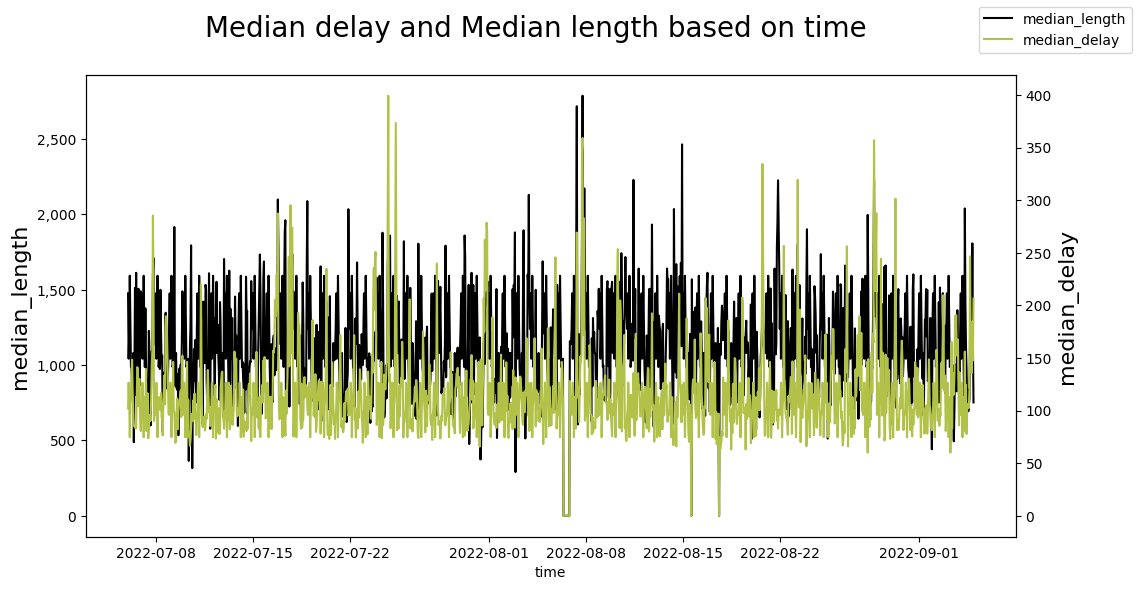

In [244]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='time',y='median_length',data=df_jams_sample,label='median_length',ax=ax,color='black',legend=False)
plt.ylabel('median_length',size=16)
ax2 = ax.twinx()
sns.lineplot(x='time',y='median_delay',data=df_jams_sample,label='median_delay',ax=ax2,color='#B2C248',legend=False)
ax.figure.legend()
plt.ylabel('median_delay',size=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle('Median delay and Median length based on time',size=20)
plt.show()

In [206]:
from scalecast import GridGenerator

In [207]:
# pilih model
models = ('mlr','elasticnet','knn','rf','gbt','xgboost','mlp')
# GridGenerator.get_grids()
GridGenerator.get_example_grids()
GridGenerator.get_mv_grids()

### Median length insight

In [208]:
# mendaftarkan kolom length
flength = Forecaster(y=df_jams_sample['median_length'],current_dates = df_jams_sample.index)
flength

Forecaster(
    DateStartActuals=2022-07-06T00:00:00.000000000
    DateEndActuals=2022-09-04T22:00:00.000000000
    Freq=H
    N_actuals=1463
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
)

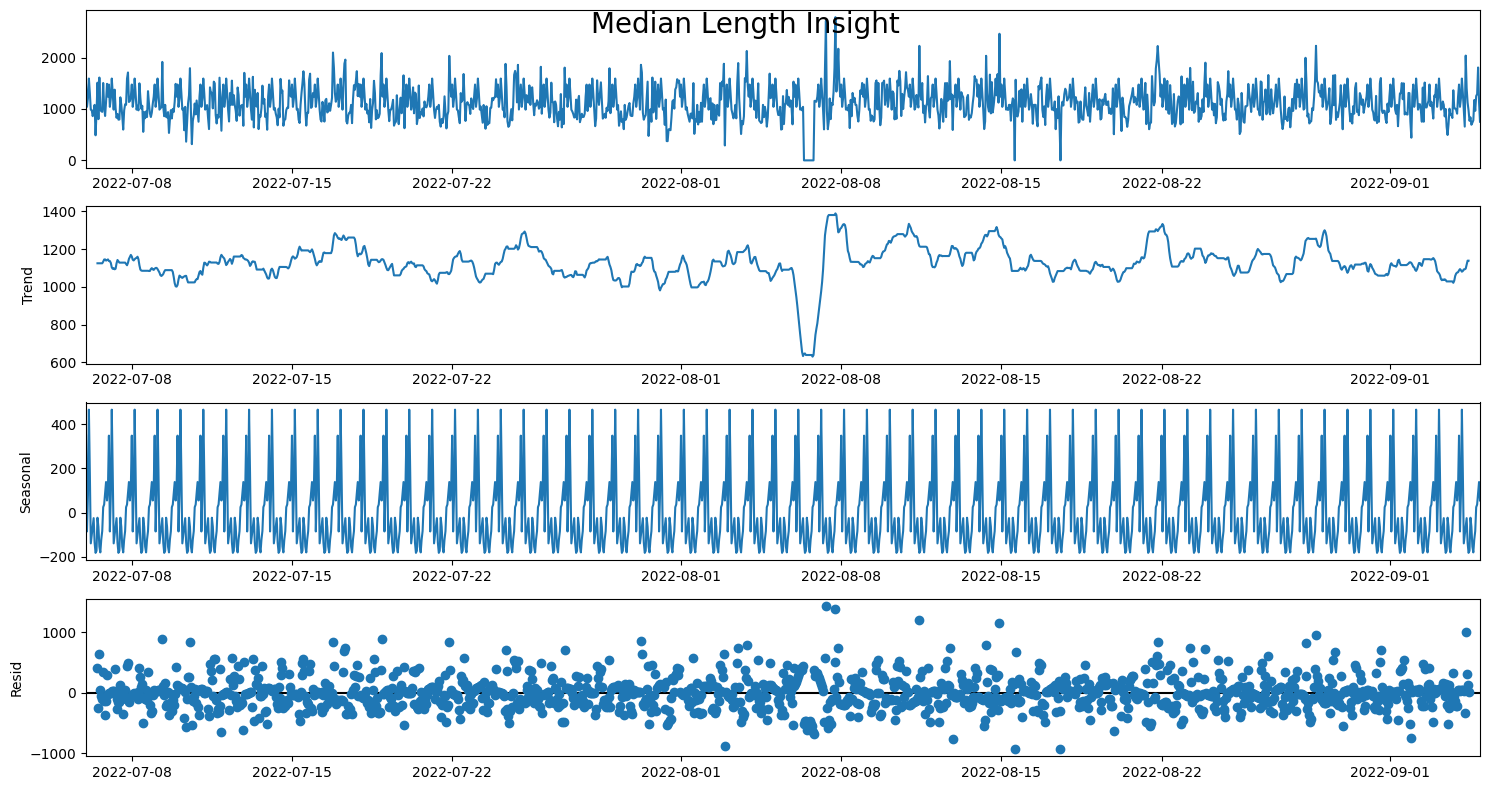

In [247]:
plt.rc("figure",figsize=(15,8))
flength.seasonal_decompose().plot()
plt.suptitle('Median Length Insight',size=20)
plt.show()

### Median delay insight

In [210]:
# mendaftarkan kolom delay
fdelay = Forecaster(y=df_jams_sample['median_delay'],current_dates = df_jams_sample.index)
fdelay

Forecaster(
    DateStartActuals=2022-07-06T00:00:00.000000000
    DateEndActuals=2022-09-04T22:00:00.000000000
    Freq=H
    N_actuals=1463
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
)

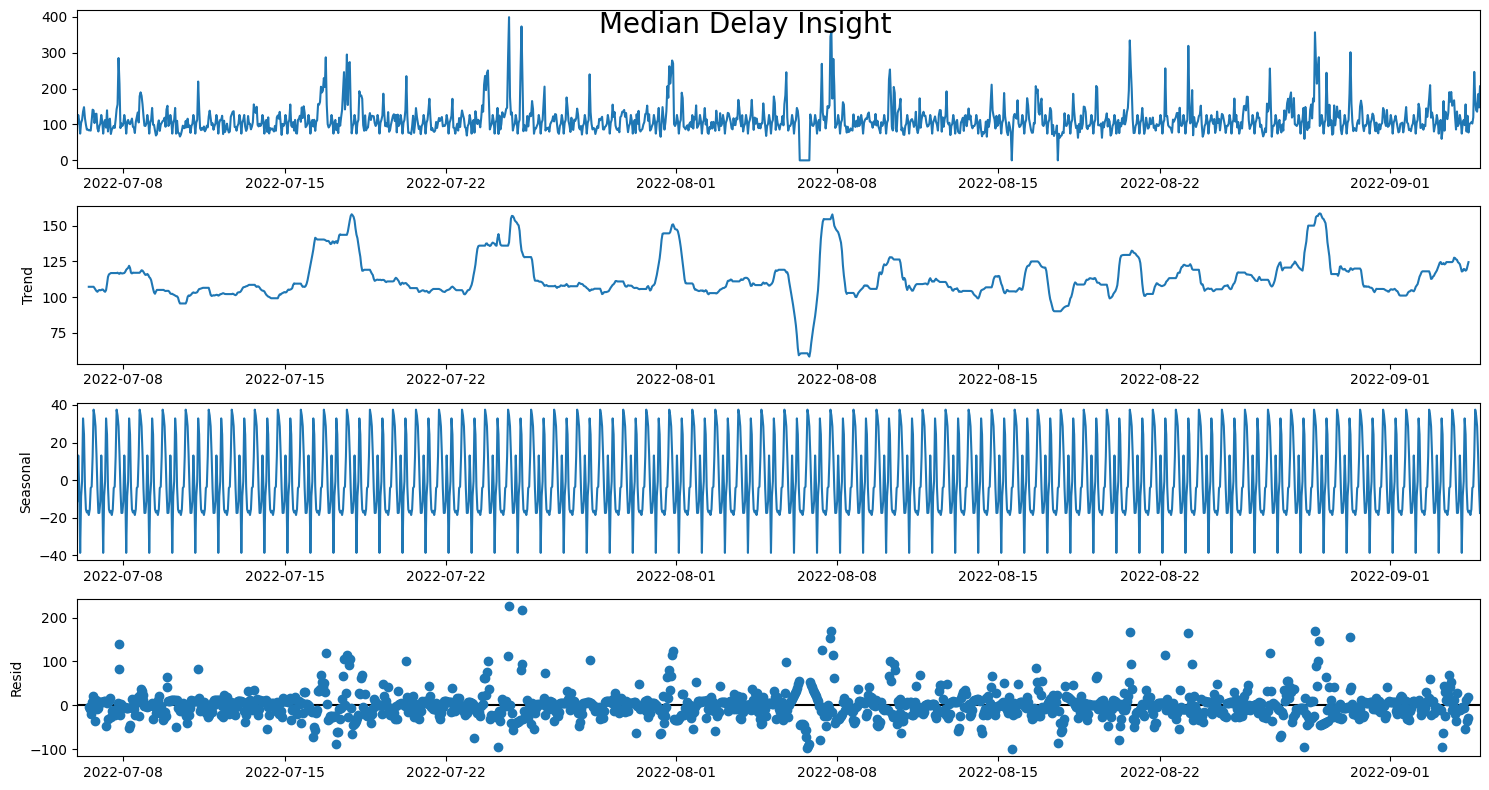

In [248]:
plt.rc("figure",figsize=(15,8))
fdelay.seasonal_decompose().plot()
plt.suptitle('Median Delay Insight',size=20)
plt.show()

### Median Speed 

In [212]:
# mendaftarkan kolom speed
fspeed = Forecaster(y=df_jams_sample['median_speed_kmh'],current_dates = df_jams_sample.index)
fspeed

Forecaster(
    DateStartActuals=2022-07-06T00:00:00.000000000
    DateEndActuals=2022-09-04T22:00:00.000000000
    Freq=H
    N_actuals=1463
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
)

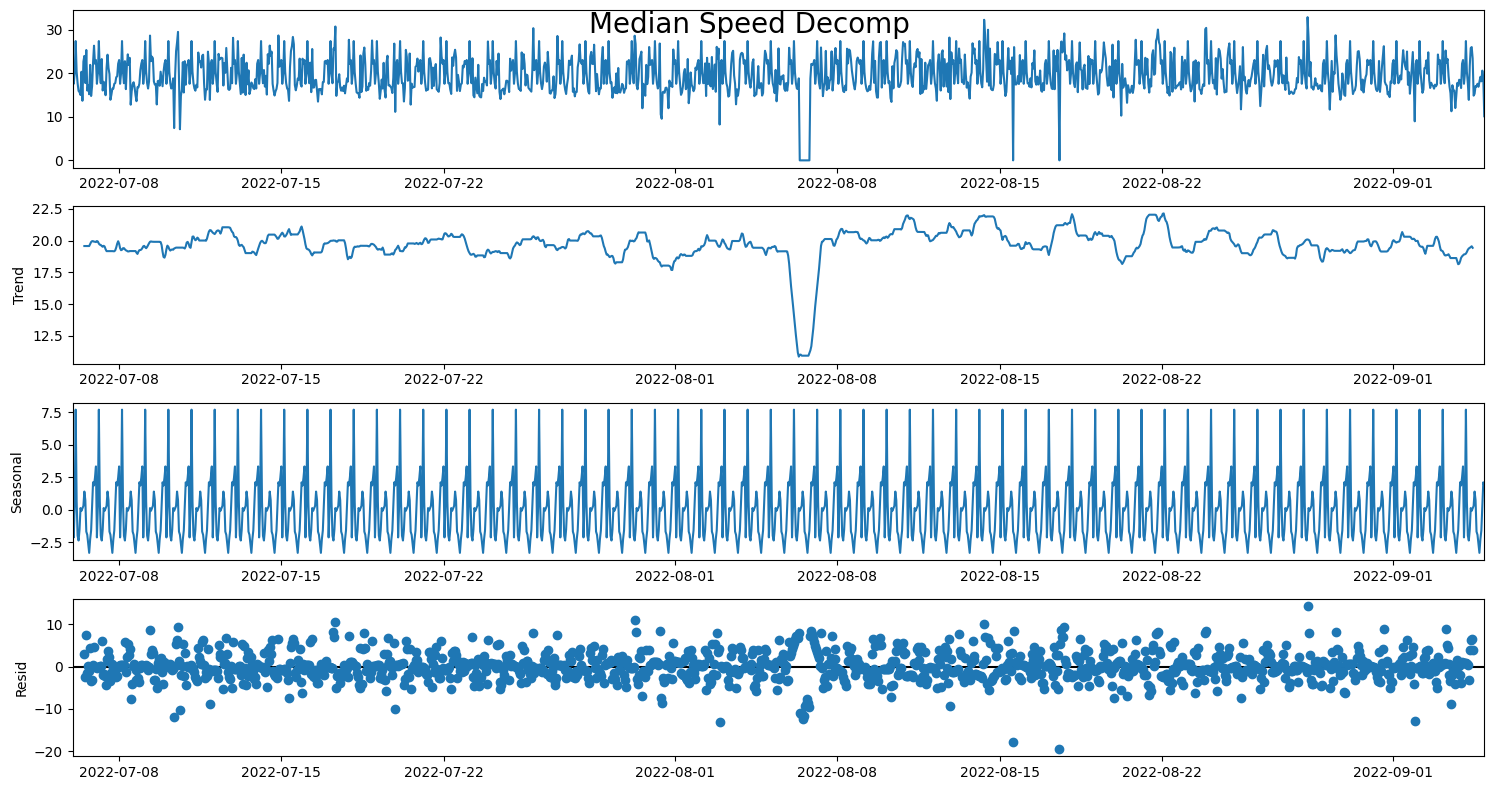

In [249]:
plt.rc("figure",figsize=(15,8))
fspeed.seasonal_decompose().plot()
plt.suptitle('Median Speed Decomp',size=20)
plt.show()

### Multivariate

In [214]:
# setting model
for f in (flength,fdelay, fspeed):
    f.generate_future_dates(7*24)
    f.set_test_length(.2)
    f.set_validation_length(4)
    f.add_seasonal_regressors('hour')
    f.add_time_trend()
    f.add_cycle(26)
    f.add_ar_terms(3)

In [215]:
# Set MV Parameter
mvf = MVForecaster(flength,fdelay,fspeed,names=['Length','Delay', 'Speed']) # init the mvf object
mvf.set_test_length(.2)
mvf.set_validation_length(4)
mvf

MVForecaster(
    DateStartActuals=2022-07-06T00:00:00.000000000
    DateEndActuals=2022-09-04T22:00:00.000000000
    Freq=H
    N_actuals=1463
    N_series=3
    SeriesNames=['Length', 'Delay', 'Speed']
    ForecastLength=168
    Xvars=['hour', 't', 'cycle26sin', 'cycle26cos']
    TestLength=292
    ValidationLength=4
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    OptimizeOn=mean
    GridsFile=MVGrids
)

In [216]:
# korelasi
mvf.corr()

,Length,Delay,Speed
Length,1.000000,0.137705,0.754260
Delay,0.137705,1.000000,-0.291226
Speed,0.754260,-0.291226,1.000000


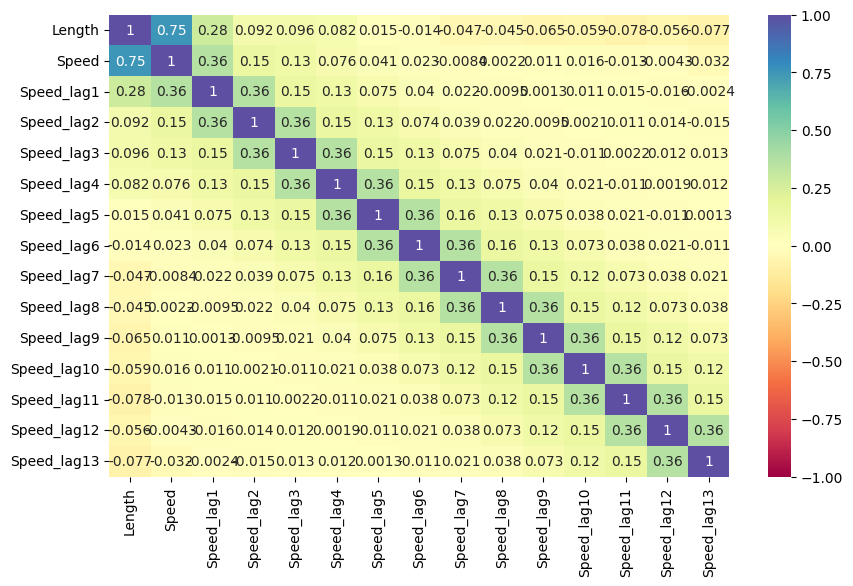

In [217]:
mvf.corr_lags(
    y='Length',
    x='Speed',
    lags=13,
    disp='heatmap',
    annot=True,
    vmin=-1,
    vmax=1,
    cmap = 'Spectral',
)
plt.show()

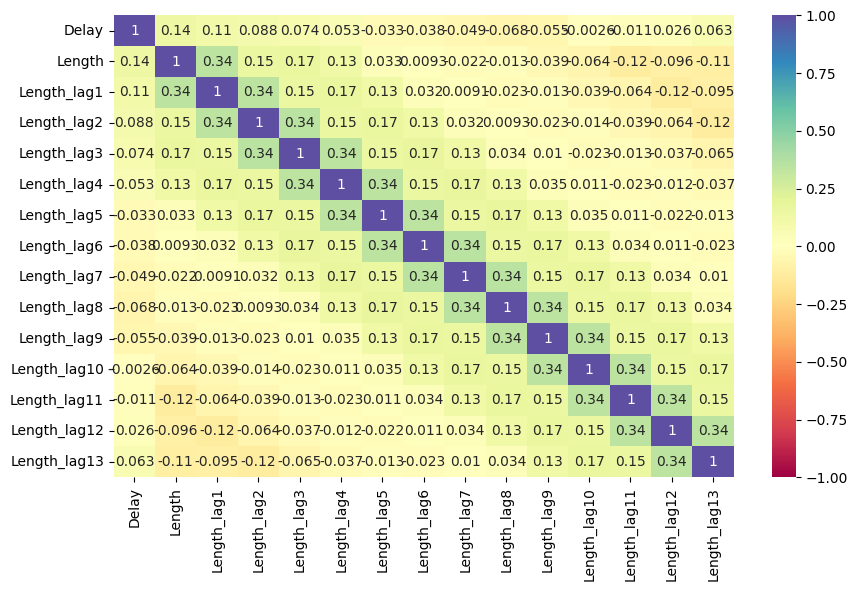

In [218]:
mvf.corr_lags(
    y='Delay',
    x='Length',
    lags=13,
    disp='heatmap',
    annot=True,
    vmin=-1,
    vmax=1,
    cmap = 'Spectral',
)
plt.show()

In [219]:
# jika ingin fokus ke satu kolom
# mvf.set_optimize_on('Length')
# jika ingin pake weight
# mvf.add_optimizer_func(lambda x: x[0]*.25 + x[1]*.75,'weighted')
# mvf.set_optimize_on('weighted')
# jika fokus ke semua kolom
mvf.set_optimize_on('mean')

In [220]:
mvf

MVForecaster(
    DateStartActuals=2022-07-06T00:00:00.000000000
    DateEndActuals=2022-09-04T22:00:00.000000000
    Freq=H
    N_actuals=1463
    N_series=3
    SeriesNames=['Length', 'Delay', 'Speed']
    ForecastLength=168
    Xvars=['hour', 't', 'cycle26sin', 'cycle26cos']
    TestLength=292
    ValidationLength=4
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    OptimizeOn=mean
    GridsFile=MVGrids
)

In [221]:
mvf.tune_test_forecast(models)
mvf.set_best_model(determine_best_by='LevelTestSetMAPE')

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the ev

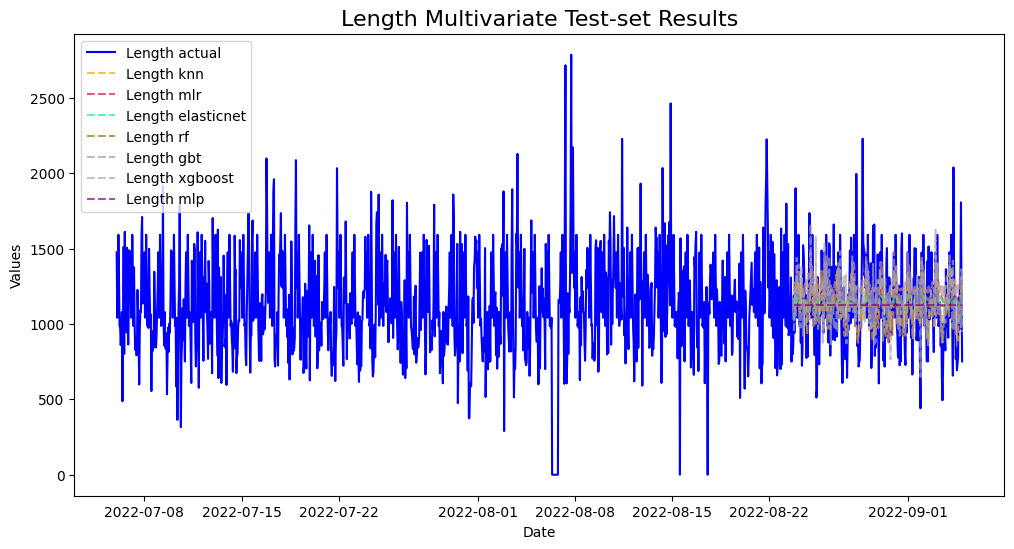

In [222]:
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='Length',put_best_on_top=True,ci=True)
plt.title('Length Multivariate Test-set Results',size=16)
plt.show()

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the ev

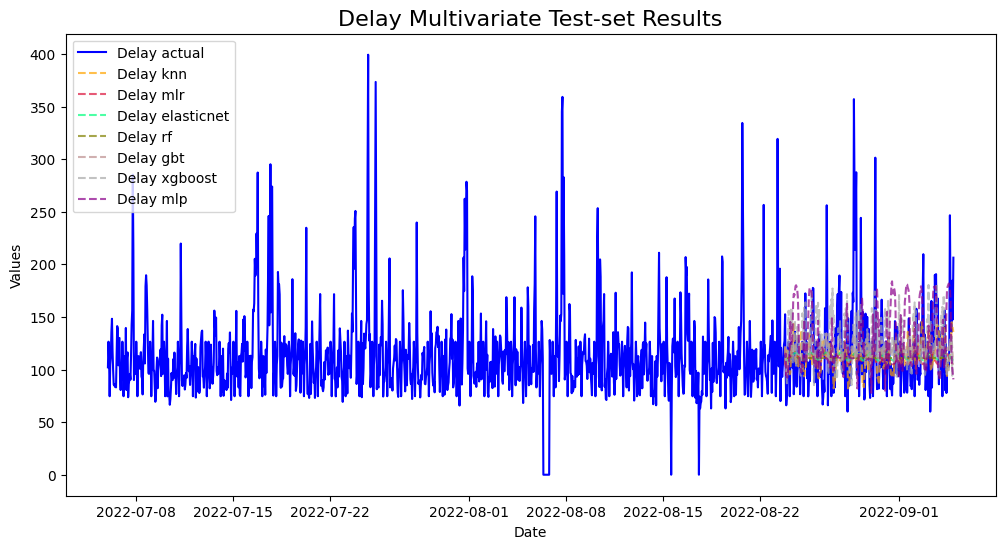

In [223]:
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='Delay',put_best_on_top=True,ci=True)
plt.title('Delay Multivariate Test-set Results',size=16)
plt.show()

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the ev

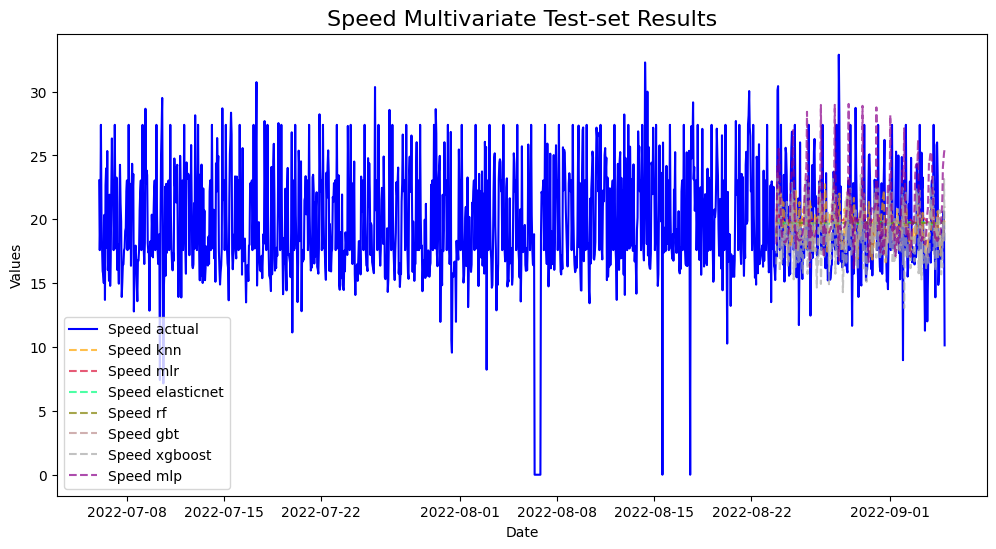

In [224]:
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='Speed',put_best_on_top=True,ci=True)
plt.title('Speed Multivariate Test-set Results',size=16)
plt.show()

In [225]:
pd.options.display.max_colwidth = 100
results = mvf.export('model_summaries')
results[
    [
        'ModelNickname',
        'Series',
        'HyperParams',
        'LevelTestSetMAPE',
        'LevelTestSetR2',
        'InSampleMAPE',
        'InSampleR2',
        'Lags'
    ]
]

,ModelNickname,Series,HyperParams,LevelTestSetMAPE,LevelTestSetR2,InSampleMAPE,InSampleR2,Lags
0,knn,Length,{'n_neighbors': 12},0.206401,8.109587e-02,NaN,3.085045e-01,6
1,mlr,Length,{},0.234004,-1.159453e-03,NaN,1.740441e-01,6
2,elasticnet,Length,"{'alpha': 0.5, 'l1_ratio': 0.5}",0.232245,4.334881e-03,NaN,1.691647e-01,6
3,rf,Length,"{'max_depth': 5, 'n_estimators': 100, 'max_features': 'sqrt', 'max_samples': 1}",0.225716,-9.369986e-04,NaN,-4.283330e-04,6
4,gbt,Length,"{'max_depth': 2, 'max_features': None}",0.260484,-6.200843e-02,NaN,4.633179e-01,6
5,xgboost,Length,"{'n_estimators': 150, 'scale_pos_weight': 5, 'learning_rate': 0.1, 'gamma': 3, 'subsample': 0.8}",0.206364,8.016118e-02,NaN,9.368630e-01,1
6,mlp,Length,"{'activation': 'tanh', 'hidden_layer_sizes': (25,), 'solver': 'lbfgs'}",0.228233,-4.212101e-07,NaN,1.553202e-13,3
7,knn,Delay,{'n_neighbors': 12},0.220793,-8.056323e-03,NaN,4.026977e-01,6
8,mlr,Delay,{},0.215173,-3.043265e-02,NaN,3.273409e-01,6
9,elasticnet,Delay,"{'alpha': 0.5, 'l1_ratio': 0.5}",0.217474,-1.172341e-02,NaN,3.060619e-01,6


In [226]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
estimators = [
    ('mlr',LinearRegression()),
    ('elasticnet',ElasticNet(**results.loc[results['ModelNickname'] == 'elasticnet','HyperParams'].values[0])),
    ('mlp',MLPRegressor(**results.loc[results['ModelNickname'] == 'mlp','HyperParams'].values[0]))
]

final_estimator = KNeighborsRegressor(**results.loc[results['ModelNickname'] == 'knn','HyperParams'].values[0])

In [227]:
mvf.add_sklearn_estimator(StackingRegressor,'stacking')
mvf.set_estimator('stacking')
mvf.manual_forecast(estimators=estimators,final_estimator=final_estimator,lags=13)

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the ev

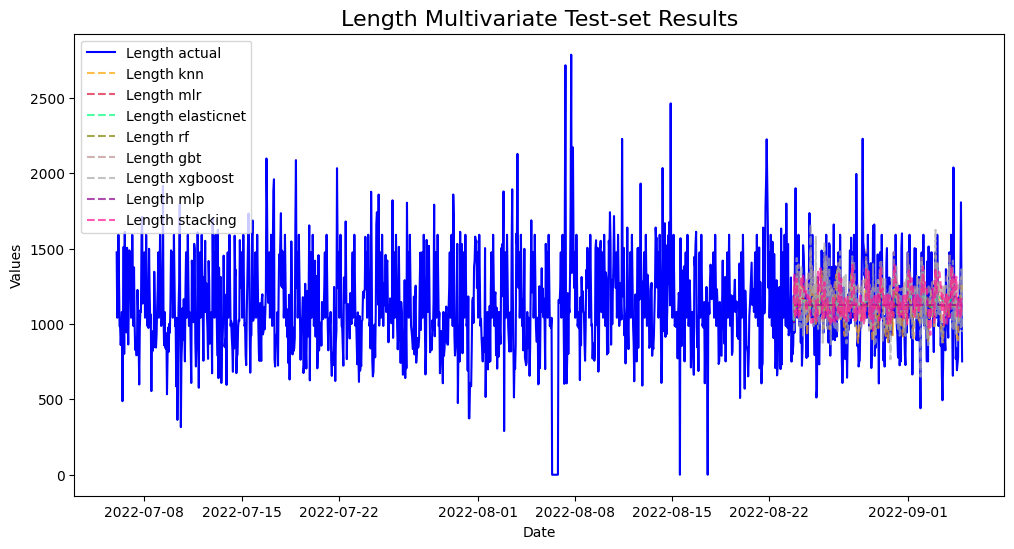

In [228]:
mvf.plot_test_set(series='Length',put_best_on_top=True,ci=True)
plt.title('Length Multivariate Test-set Results',size=16)
plt.show()

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the ev

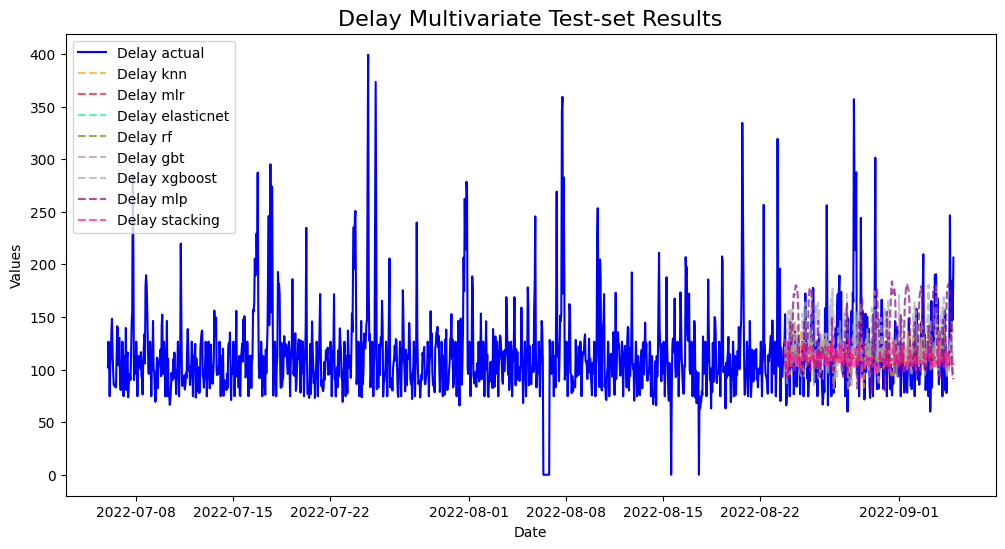

In [229]:
mvf.plot_test_set(series='Delay',put_best_on_top=True,ci=True)
plt.title('Delay Multivariate Test-set Results',size=16)
plt.show()

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the ev

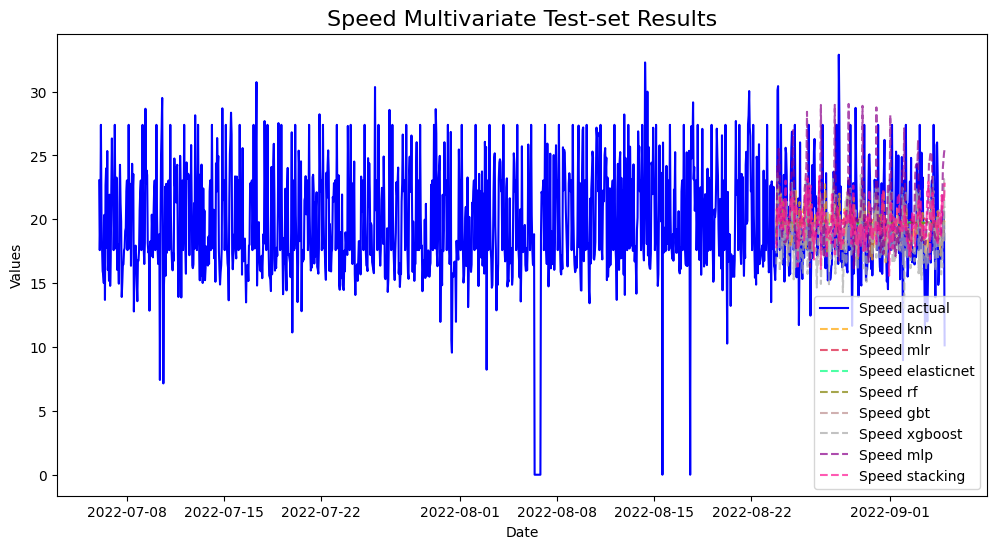

In [230]:
mvf.plot_test_set(series='Speed',put_best_on_top=True,ci=True)
plt.title('Speed Multivariate Test-set Results',size=16)
plt.show()

In [231]:
mvf.set_best_model(determine_best_by='LevelTestSetMAPE')
results2 = mvf.export('model_summaries')
results2[
    [
        'ModelNickname',
        'Series',
        'LevelTestSetMAPE',
        'LevelTestSetR2',
        'InSampleMAPE',
        'InSampleR2',
        'Lags',
        'best_model'
    ]
]

,ModelNickname,Series,LevelTestSetMAPE,LevelTestSetR2,InSampleMAPE,InSampleR2,Lags,best_model
0,knn,Length,0.206401,8.109587e-02,NaN,3.085045e-01,6,True
1,mlr,Length,0.234004,-1.159453e-03,NaN,1.740441e-01,6,False
2,elasticnet,Length,0.232245,4.334881e-03,NaN,1.691647e-01,6,False
3,rf,Length,0.225716,-9.369986e-04,NaN,-4.283330e-04,6,False
4,gbt,Length,0.260484,-6.200843e-02,NaN,4.633179e-01,6,False
5,xgboost,Length,0.206364,8.016118e-02,NaN,9.368630e-01,1,False
6,mlp,Length,0.228233,-4.212101e-07,NaN,1.553202e-13,3,False
7,stacking,Length,0.247255,-1.279675e-01,NaN,8.990344e-02,13,False
8,knn,Delay,0.220793,-8.056323e-03,NaN,4.026977e-01,6,True
9,mlr,Delay,0.215173,-3.043265e-02,NaN,3.273409e-01,6,False


In [232]:
print('-'*100)
for series in results2['Series'].unique():
    print('multivariate average test MAPE for {}: {:.4f}'.format(series,results2.loc[results2['Series'] == series,'LevelTestSetMAPE'].mean()))
    print('multivariate average test R2 for {}: {:.2f}'.format(series,results2.loc[results2['Series'] == series,'LevelTestSetR2'].mean()))
    print('-'*100)

----------------------------------------------------------------------------------------------------
multivariate average test MAPE for Length: 0.2301
multivariate average test R2 for Length: -0.00
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for Delay: 0.2422
multivariate average test R2 for Delay: -0.11
----------------------------------------------------------------------------------------------------
multivariate average test MAPE for Speed: 0.1620
multivariate average test R2 for Speed: -0.04
----------------------------------------------------------------------------------------------------


c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


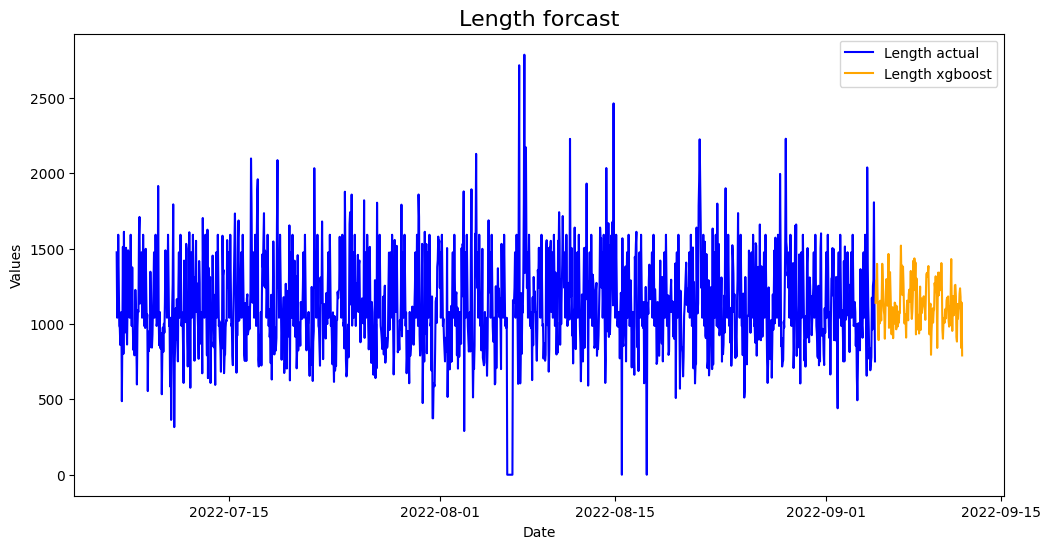

In [233]:
mvf.plot(series='Length',models='xgboost',ci=True)
plt.title('Length forcast',size=16)
plt.show()

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for stacking. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


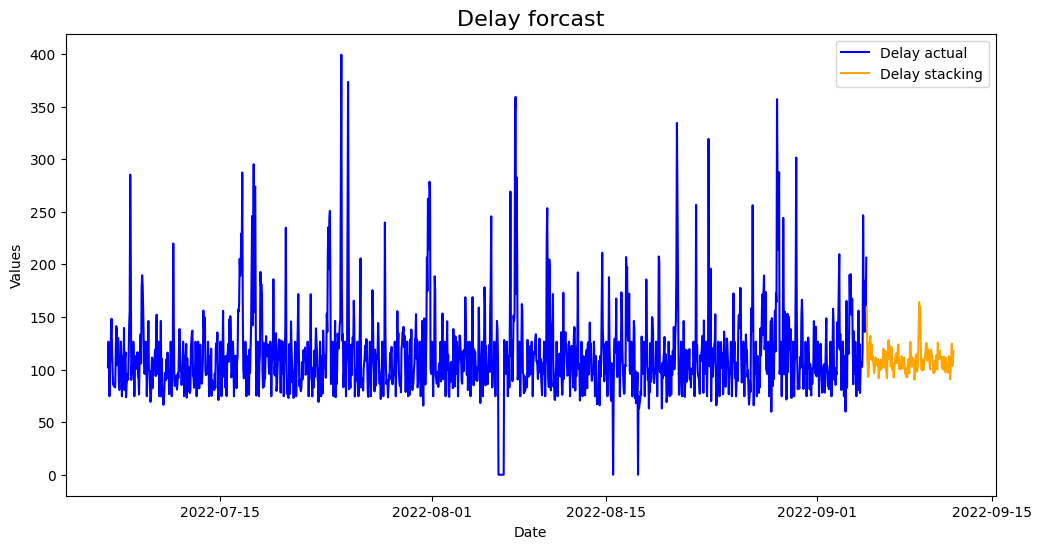

In [234]:
mvf.plot(series='Delay',models='stacking',ci=True)
plt.title('Delay forcast',size=16)
plt.show()

c:\Users\handh\AppData\Local\Programs\Python\Python38\lib\site-packages\scalecast\Forecaster.py:5650: Warning: Confidence intervals not found for stacking. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


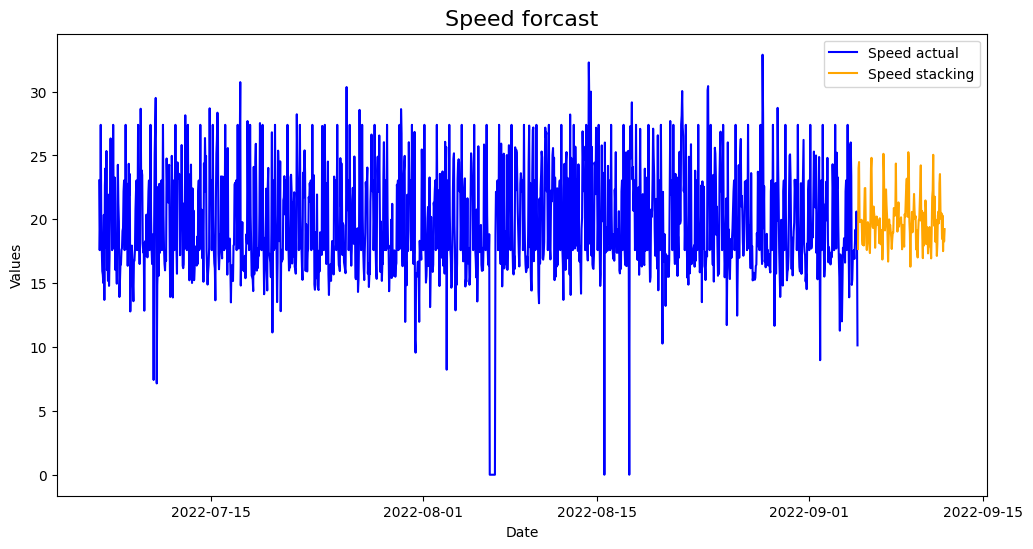

In [235]:
mvf.plot(series='Speed',models='stacking',ci=True)
plt.title('Speed forcast',size=16)
plt.show()

In [236]:
df_result = mvf.export_fitted_vals()

In [237]:
df_result.tail(3)

,DATE,Length_actuals,Length_mlr_fvs,Length_elasticnet_fvs,Length_knn_fvs,Length_rf_fvs,Length_gbt_fvs,Length_xgboost_fvs,Length_mlp_fvs,Length_stacking_fvs,...,Delay_stacking_fvs,Speed_actuals,Speed_mlr_fvs,Speed_elasticnet_fvs,Speed_knn_fvs,Speed_rf_fvs,Speed_gbt_fvs,Speed_xgboost_fvs,Speed_mlp_fvs,Speed_stacking_fvs
1447,2022-09-04 20:00:00,1807.50,1175.095295,1179.250495,1207.541667,1118.340344,1418.578733,1671.840454,1125.380589,1190.520833,...,130.105972,20.610,19.068331,19.491094,19.166667,19.790118,18.815385,19.330591,20.168678,20.308571
1448,2022-09-04 21:00:00,1134.75,1307.188477,1294.613819,1091.395833,1118.340344,1341.661365,1127.588623,1125.380589,1285.153314,...,188.013889,19.075,18.765839,20.155543,17.167500,19.790118,20.824962,19.075811,18.751633,18.802936
1449,2022-09-04 22:00:00,752.00,1261.638052,1239.352406,1123.553075,1118.340344,1060.852771,753.405884,1125.380589,1283.134740,...,157.842262,10.130,20.242436,20.142068,18.138988,19.790118,14.974277,11.207953,17.679880,19.495036


In [238]:
results = mvf.export(dfs=['model_summaries','lvl_fcsts'],to_excel=True)

In [239]:
results['lvl_fcsts']

,DATE,Length_knn_lvl_fcst,Length_mlr_lvl_fcst,Length_elasticnet_lvl_fcst,Length_rf_lvl_fcst,Length_gbt_lvl_fcst,Length_xgboost_lvl_fcst,Length_mlp_lvl_fcst,Length_stacking_lvl_fcst,Delay_knn_lvl_fcst,...,Delay_mlp_lvl_fcst,Delay_stacking_lvl_fcst,Speed_knn_lvl_fcst,Speed_mlr_lvl_fcst,Speed_elasticnet_lvl_fcst,Speed_rf_lvl_fcst,Speed_gbt_lvl_fcst,Speed_xgboost_lvl_fcst,Speed_mlp_lvl_fcst,Speed_stacking_lvl_fcst
0,2022-09-04 23:00:00,1058.198909,1109.502460,1106.094939,1118.340344,869.765404,1140.726074,1125.380589,1227.397817,133.499091,...,196.609274,159.482639,18.133363,17.659091,18.168278,19.790118,14.890852,14.981844,15.787083,17.674108
1,2022-09-05 00:00:00,1298.289286,1274.347616,1249.010984,1118.340344,1099.331498,1288.226196,1125.380589,1287.429978,97.636161,...,85.229449,112.679294,21.790863,20.288529,19.624489,19.790118,16.096362,19.537809,24.740262,24.018333
2,2022-09-05 01:00:00,1218.787936,1212.151696,1198.487809,1118.340344,1024.487149,1163.808350,1125.380589,1273.092073,109.470394,...,85.229460,100.124612,19.752137,20.666579,19.731981,19.790118,16.172150,20.020937,25.330805,24.486220
3,2022-09-05 02:00:00,1170.727197,1218.142454,1191.257244,1118.340344,1130.756362,1399.246582,1125.380589,1287.429978,112.805713,...,111.110256,92.971992,19.773288,21.141786,20.099759,19.790118,16.017143,24.948231,21.491741,20.039056
4,2022-09-05 03:00:00,1278.052990,1260.573408,1217.310223,1118.340344,1236.140553,1180.964233,1125.380589,1253.630574,108.890427,...,113.176312,100.414047,21.231567,21.045116,20.059064,19.790118,15.973198,20.455307,18.850577,19.781286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-09-11 18:00:00,1083.573909,1106.492803,1115.316353,1118.340344,1075.736722,1236.944092,1125.380589,1103.770833,127.978257,...,113.189010,114.238095,18.750238,19.660778,19.649461,19.790118,12.939025,17.853512,13.532753,20.296703
164,2022-09-11 19:00:00,1254.698909,1108.282508,1117.026295,1118.340344,1087.835684,1178.245483,1125.380589,1037.528454,139.472702,...,113.190682,124.564484,18.851488,19.664677,19.656262,19.790118,12.939025,18.830980,14.023577,17.509675
165,2022-09-11 20:00:00,1188.293651,1109.540536,1118.399706,1118.340344,1091.833434,841.739502,1125.380589,1033.419792,129.607209,...,113.193670,103.299722,18.677143,19.665824,19.664504,19.790118,14.065212,15.554538,15.057836,19.243841
166,2022-09-11 21:00:00,1209.460317,1109.955785,1119.194597,1118.340344,1091.833434,1142.333496,1125.380589,1172.000000,137.596792,...,113.190834,109.682540,18.478810,19.662967,19.673629,19.790118,16.326047,12.960082,16.341514,18.268728


In [240]:
results

{'model_summaries':     Series ModelNickname   Estimator                              Xvars  \
 0   Length           knn         knn  [hour, t, cycle26sin, cycle26cos]   
 1   Length           mlr         mlr  [hour, t, cycle26sin, cycle26cos]   
 2   Length    elasticnet  elasticnet  [hour, t, cycle26sin, cycle26cos]   
 3   Length            rf          rf  [hour, t, cycle26sin, cycle26cos]   
 4   Length           gbt         gbt  [hour, t, cycle26sin, cycle26cos]   
 5   Length       xgboost     xgboost  [hour, t, cycle26sin, cycle26cos]   
 6   Length           mlp         mlp  [hour, t, cycle26sin, cycle26cos]   
 7   Length      stacking    stacking  [hour, t, cycle26sin, cycle26cos]   
 8    Delay           knn         knn  [hour, t, cycle26sin, cycle26cos]   
 9    Delay           mlr         mlr  [hour, t, cycle26sin, cycle26cos]   
 10   Delay    elasticnet  elasticnet  [hour, t, cycle26sin, cycle26cos]   
 11   Delay            rf          rf  [hour, t, cycle26sin, cycle26c

In [241]:
results["model_summaries"]

,Series,ModelNickname,Estimator,Xvars,HyperParams,Lags,Scaler,Observations,Tuned,CrossValidated,...,LevelTestSetMAPE,LevelTestSetMAE,LevelTestSetR2,LevelInSampleRMSE,LevelInSampleMAPE,LevelInSampleMAE,LevelInSampleR2,OptimizedOn,MetricOptimized,best_model
0,Length,knn,knn,"[hour, t, cycle26sin, cycle26cos]",{'n_neighbors': 12},6,minmax,1463,True,False,...,0.206401,217.718390,8.109587e-02,268.782567,NaN,203.881666,3.085045e-01,mean,LevelTestSetMAPE,True
1,Length,mlr,mlr,"[hour, t, cycle26sin, cycle26cos]",{},6,scale,1463,True,False,...,0.234004,236.876499,-1.159453e-03,293.754731,NaN,226.710133,1.740441e-01,mean,LevelTestSetMAPE,False
2,Length,elasticnet,elasticnet,"[hour, t, cycle26sin, cycle26cos]","{'alpha': 0.5, 'l1_ratio': 0.5}",6,scale,1463,True,False,...,0.232245,236.234075,4.334881e-03,294.621130,NaN,228.639124,1.691647e-01,mean,LevelTestSetMAPE,False
3,Length,rf,rf,"[hour, t, cycle26sin, cycle26cos]","{'max_depth': 5, 'n_estimators': 100, 'max_features': 'sqrt', 'max_samples': 1}",6,minmax,1463,True,False,...,0.225716,234.309099,-9.369986e-04,323.295325,NaN,249.762708,-4.283330e-04,mean,LevelTestSetMAPE,False
4,Length,gbt,gbt,"[hour, t, cycle26sin, cycle26cos]","{'max_depth': 2, 'max_features': None}",6,minmax,1463,True,False,...,0.260484,245.499622,-6.200843e-02,236.790879,NaN,165.016470,4.633179e-01,mean,LevelTestSetMAPE,False
5,Length,xgboost,xgboost,"[hour, t, cycle26sin, cycle26cos]","{'n_estimators': 150, 'scale_pos_weight': 5, 'learning_rate': 0.1, 'gamma': 3, 'subsample': 0.8}",1,minmax,1463,True,False,...,0.206364,214.159514,8.016118e-02,81.153880,NaN,54.126209,9.368630e-01,mean,LevelTestSetMAPE,False
6,Length,mlp,mlp,"[hour, t, cycle26sin, cycle26cos]","{'activation': 'tanh', 'hidden_layer_sizes': (25,), 'solver': 'lbfgs'}",3,minmax,1463,True,False,...,0.228233,235.071339,-4.212101e-07,323.180645,NaN,250.241082,1.553202e-13,mean,LevelTestSetMAPE,False
7,Length,stacking,stacking,"[hour, t, cycle26sin, cycle26cos]","{'estimators': [('mlr', LinearRegression()), ('elasticnet', ElasticNet(alpha=0.5)), ('mlp', MLPR...",13,minmax,1463,None,False,...,0.247255,252.276503,-1.279675e-01,308.365887,NaN,231.544724,8.990344e-02,mean,LevelTestSetMAPE,False
8,Delay,knn,knn,"[hour, t, cycle26sin, cycle26cos]",{'n_neighbors': 12},6,minmax,1463,True,False,...,0.220793,26.941742,-8.056323e-03,31.300254,NaN,20.546148,4.026977e-01,mean,LevelTestSetMAPE,True
9,Delay,mlr,mlr,"[hour, t, cycle26sin, cycle26cos]",{},6,scale,1463,True,False,...,0.215173,26.739273,-3.043265e-02,33.216073,NaN,22.605231,3.273409e-01,mean,LevelTestSetMAPE,False
